<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [21]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Familiarize with the data set

In [3]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Generate Descriptive Statistics and Visualizations


**For the "Median value of owner-occupied homes" provide a boxplot**

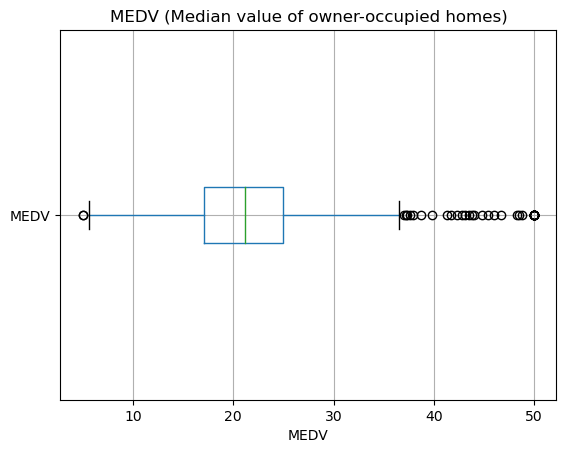

In [5]:
boston_df.boxplot(column="MEDV", vert=False)
plt.title("MEDV (Median value of owner-occupied homes)")
plt.xlabel("MEDV")
plt.grid(True)
plt.show()

**Provide a  bar plot for the Charles river variable**

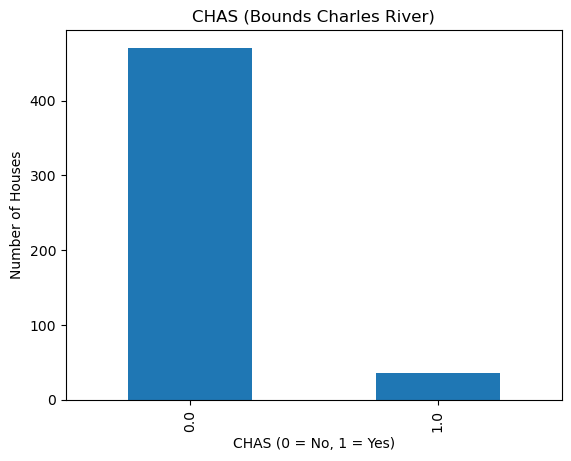

In [6]:
chas_counts = boston_df["CHAS"].value_counts().sort_index()

chas_counts.plot(kind="bar")
plt.title("CHAS (Bounds Charles River)")
plt.xlabel("CHAS (0 = No, 1 = Yes)")
plt.ylabel("Number of Houses")
plt.show()

**Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

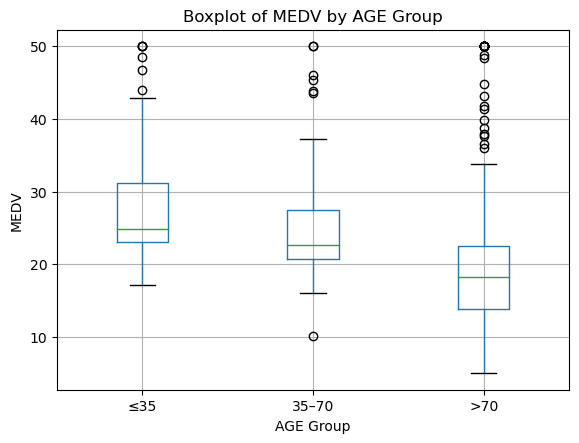

In [7]:
age = [0, 35, 70, float('inf')]
age_labels = ['≤35', '35–70', '>70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=age, labels=age_labels)

boston_df.boxplot(column='MEDV', by='AGE_group')
plt.title('Boxplot of MEDV by AGE Group')
plt.suptitle('')  # Remove the automatic subtitle
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

**Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

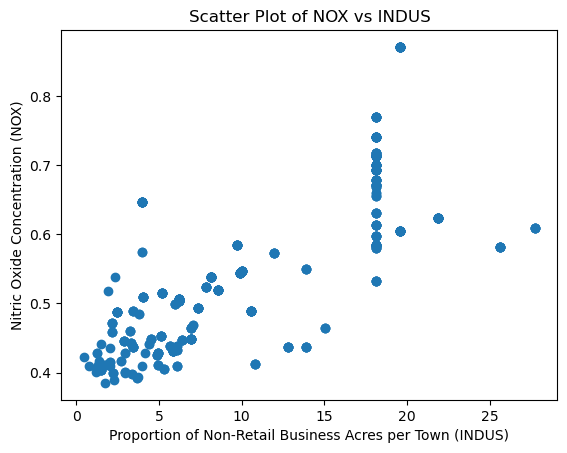

In [8]:
plt.scatter(boston_df["INDUS"], boston_df["NOX"])
plt.title("Scatter Plot of NOX vs INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.show()

At first glance, an increasing trend can be observed: as the proportion of industrial areas increases, the NOX concentration also tends to increase. This suggests a possible positive correlation between these variables.

**Create a histogram for the pupil to teacher ratio variable**

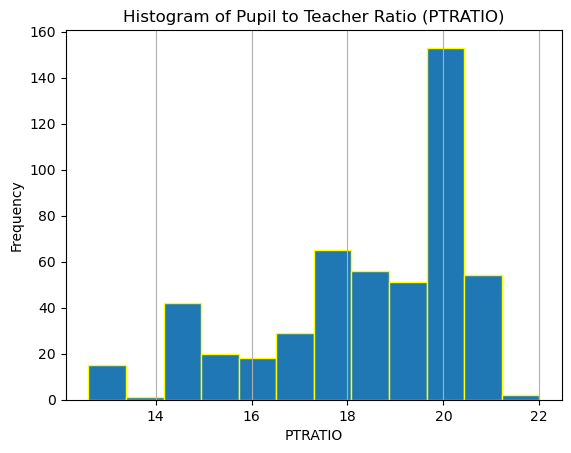

In [9]:
boston_df["PTRATIO"].hist(bins=12, edgecolor="yellow")
plt.title("Histogram of Pupil to Teacher Ratio (PTRATIO)")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided.

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

Be sure to:

- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

Hypothesis:

- H₀ (null hypothesis): There is no significant difference in mean housing value (MEDV) between those bordering the Charles River and those that do not.

- H₁ (alternative hypothesis): There is a significant difference in mean housing value between the two groups.

In [10]:
from scipy.stats import ttest_ind

# Separate MEDV values based on CHAS (0: not bounded by river, 1: bounded by river)
medv_chas_0 = boston_df[boston_df["CHAS"] == 0]["MEDV"]
medv_chas_1 = boston_df[boston_df["CHAS"] == 1]["MEDV"]

# Perform independent t-test
t_stat, p_value = ttest_ind(medv_chas_0, medv_chas_1, equal_var=False)

t_stat, p_value

(-3.113291312794837, 0.003567170098137517)

Since the p-value = 0.00357 < α = 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference in the mean value of homes between those next to the Charles River and those that are not.

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

Be sure to:

- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

Hypothesis:
- H₀ (null hypothesis): There are no significant differences in mean housing value (MEDV) between the defined age groups.

- H₁ (alternative hypothesis): At least one of the age groups has a significantly different mean housing value.

In [16]:
from scipy.stats import f_oneway

age_bins = [0, 35, 70, float('inf')]
age_labels = ['≤35', '35–70', '>70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

medv_age_1 = boston_df[boston_df['AGE_group'] == '≤35']['MEDV']
medv_age_2 = boston_df[boston_df['AGE_group'] == '35–70']['MEDV']
medv_age_3 = boston_df[boston_df['AGE_group'] == '>70']['MEDV']

f_stat, p_value_anova = f_oneway(medv_age_1, medv_age_2, medv_age_3)

f_stat, p_value_anova

(36.40764999196599, 1.7105011022702984e-15)

Since the p-value is much less than 0.05, we reject the null hypothesis.
This indicates that there is indeed a statistically significant difference in the mean value of dwellings between the groups defined by age (AGE).


**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

Be sure to:

- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

Hypothesis:
- H₀ (null hypothesis): There is no linear relationship between the concentration of nitric oxides (NOX) and the proportion of industrial areas (INDUS).

- H₁ (alternative hypothesis): There is a linear relationship between NOX and INDUS.

In [17]:
from scipy.stats import pearsonr

corr_coef, p_value_corr = pearsonr(boston_df["NOX"], boston_df["INDUS"])

corr_coef, p_value_corr

(0.7636514469209152, 7.913361061237794e-98)

Since the p-value is much less than 0.05, we reject the null hypothesis.
This indicates that there is a strong positive linear relationship between the concentration of nitric oxides (NOX) and the proportion of industrial land (INDUS). That is, the higher the proportion of industrial sites, the higher the concentration of NOX pollutants.

**What is the impact of an additional weighted distance  to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV)? (Regression analysis)**

Be sure to:

- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.


Hypothesis:

- H₀ (null hypothesis): The coefficient of the DIS variable is equal to zero. There is no relationship between distance to work centers and mean housing value.

- H₁ (alternative hypothesis): The coefficient of the DIS variable is non-zero. There is relationship.


In [20]:
import statsmodels.api as sm

X = boston_df["DIS"]
y = boston_df["MEDV"]

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.21e-08
Time:                        12:08:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Coefficient for DIS = 1.092
- p-value for DIS = 0.000
- R² = 0.062 → The model explains approximately 6.2% of the variability in median housing values.

Since the p-value is much less than 0.05, we reject the null hypothesis.
This indicates that the weighted distance to employment centers (DIS) has a significant effect on the mean value of dwellings.